# Risk Return of a Portfolio

All investors know that there is a trade off between risk and return.<br>
The greater the risk taken, the higher the return.<br>
Investors make a trade off between risk & expected return – *not risk and actual return*.<br>

In the domain of return on investment (ROI), expected return refers to its average (mean).<br>
It’s the weighted average of the possible outcomes.<br>
The weight of a particular return is the probability of that return occurring.<br>

## Example

Given you have $100,000 to invest for 1 year.<br>
Treasury bills yield 5% (TBills pay a lot less, but this is for demonstration purposes only)<br>
One alternative is to invest in TBills for no risk where the expected return is 5%.<br>
Another alternative is to invest in stock.<br>

Suppose the possible outcomes from investing in stock are <br>

|Probability |Return (%)
| :- |---
|0.05|50
|0.25|30
|0.4|10
|0.25|-10
|0.05|-30

i.e. there is a 0.05 probability that the return will be +50%, a 0.25 probability that the return will be 30%, etc.

The expected return is calculated by 
(0.05 $*$ 0.5) + (0.25 $*$ 0.3) + (0.4 $*$ 0.1) + (0.25 $*$ -0.1) + (0.05 $*$ -0.3) =  0.1

The python code to perform this calculation:

In [1]:
exp_ret = (0.05 * 0.5) + (0.25 * 0.3) + (0.4 * 0.1) + (0.25 * -0.1) + (0.05 * -0.3)

round(exp_ret, 2)

0.1

So for taking some risk, you should expect to increase your expected return from 5% as offered by TBills, to 10%.

On the \\$100,000 investment, you may also get returns as high as 50% (\\$50,000) but you could also lose up to \\$30,000.

## Quantifying Risk

Often the std deviation, $\sigma$, is used

$\sigma = \sqrt{E(R^2) - [E(R)]^2}$

$E(R^2) = (0.05 * 0.5^2) + (0.25 * 0.3^2) + (0.4 * 0.1^2) + 
(0.25 * (-0.1)^2) + (0.05 * (-0.3)^2) = 0.046$


The python code to perform this calculation:

In [2]:
E_Rsqrd = (0.05 * 0.5**2) + (0.25 * 0.3**2) + (0.4 * 0.1**2) + (0.25 * (-0.1)**2) + (0.05 * (-0.3)**2)

round(E_Rsqrd, 3)

0.046

 and <br>
 
 $[E(R)]^2 = 0.1^2 = 0.01$
 
 The python code to perform this calculation:

In [3]:
ER_sqrd = 0.1**2

round(ER_sqrd, 2)

0.01

**Calculate the standard deviation** 

The standard deviation, $\sigma = 0.1897$

From above, it is obtained by this formula, $\sigma = \sqrt{E(R^2) - [E(R)]^2}$

The python code to perform this calculation:

In [4]:
import math

std_dev = math.sqrt(E_Rsqrd - ER_sqrd)
round(std_dev, 4)

0.1897

## Calculating the expected return on a portfolio

A portfolio consisting of 2 securities with returns $R_1$ and $R_2$

Put a proportion of money into the first, $w_1$, <br>
and the remainder into the second $w_2$ = $1 – w_1$

The return on the investment is $w_1R_1$ + $w_2R_2$

The portfolio expected return $\mu_p$ = $w_1\mu_1$ + $w_2\mu_2$<br>

where<br>
    $\mu_1$ is the expected return on the first investment<br>
    $\mu_2$ is the expected return on the second investment

The standard deviation, $\sigma_p$ of such a portfolio is

$\sigma_p = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2\rho w_1w_2\sigma_1\sigma_2}$

where

$\sigma_1$ and $\sigma_2$ are the std deviation of $R_1$ and $R_2$<br>
$\rho$ is the coefficient of correlation between $\sigma_1$ and $\sigma_2$

Given the following:<br>
$\mu_1 = 10\%$  $\sigma_1 = 16\%$<br>
$\mu_2 = 15\%$  $\sigma_2 = 24\%$<br>
$\rho = 20\%$


The expected return and standard deviation for this portfolio for weights of  

(0%, 100%), (20%, 80%), (40%, 60%), (60%, 40%), (80%, 20%), (100%, 0%)

is

|$w_1$|$w_2$|$\mu_p$|$\sigma_p$
|---|---|---|---
|0.0|1.0|15%|24.00%
|0.2|0.8|14%|20.09%
|0.4|0.6|13%|16.89%
|0.6|0.4|12%|14.87%
|0.8|0.2|11%|14.54%
|1.0|0.0|10%|16.00%

E.g. for $w_1 = 0.2$ and $w_2 = 0.8$

In [5]:
w1 = 0.2
w2 = 0.8

mu1 = 0.1
mu2 = 0.15

sigma1 = 0.16
sigma2 = 0.24

rho = 0.2

In [6]:
exp_ret_portfolio = (w1 * mu1) + (w2 * mu2)
round(exp_ret_portfolio, 2)

0.14

In [7]:
std_dev_portfolio = math.sqrt((w1**2 * sigma1**2) + (w2**2 * sigma2**2) + (2 * rho * w1 * w2 * sigma1 * sigma2))
round(std_dev_portfolio * 100, 2)

20.09

## Calculating the expected return

From above, the return on the investment is $w_1R_1$ + $w_2R_2$

We'll create a simple python function and a test (the results are taken from above) to calculate this

**A simple function to calculate the expected return**

This function will take 4 arguments, w1, er1, w2 and er2

In [8]:
def calc_exp_ret(w1, er1, w2, er2):
    return (w1 * er1) + (w2 * er2)

Check that the following 'unit test' passes

In [9]:
#simple test
er = calc_exp_ret(0.2,0.1,0.8,0.15)

# assert will throw an error if the expression after it is not True
assert round(er,2) == 0.14

## Calculating the standard deviation

From above, the standard deviation, $\sigma_p$ of such a portfolio is

$\sigma_p = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2\rho w_1w_2\sigma_1\sigma_2}$

We'll create another python function to perform this calculation

This function will take 5 arguments
w1, sd1, w2, sd2, coeff

In [10]:
def calc_std_dev(w1, sd1, w2, sd2, coeff):
    return math.sqrt( (w1**2 * sd1**2) + (w2**2 * sd2**2) + (2 * coeff * w1 * w2 * sd1 * sd2))

Check that the following 'unit test' passes

In [11]:
#simple test
sd = calc_std_dev(0.2, 0.16, 0.8, 0.24, 0.2)

# assert will throw an error if the expression after it is not True
assert round(sd, 4) == 0.2009

## Pulling it all together

You can create the set of expected returns and standard deviations as a pandas DataFrame.

Then, using the 2 functions defined above (calc_exp_ret and calc_std_dev)<br>
and the values

$\mu_1 = 10\%$  $\sigma_1 = 16\%$<br>
$\mu_2 = 15\%$  $\sigma_2 = 24\%$<br>
$\rho = 20\%$

You can write 2 new functions that act on each individual row of the DataFrame, 1 to populate the cell with an expected return and the other function to populate the cell with the standard deviation.

We can also use the DataFrame apply method to apply these functions to each individual row of the DataFrame.

First we'll create the DataFrame, initialized.

2 columns and 6 rows

|$w_1$|$w_2$
|---|---
|0.0|1.0
|0.2|0.8
|0.4|0.6
|0.6|0.4
|0.8|0.2
|1.0|0.0

In [12]:
import pandas as pd

Pfolio_DF = pd.DataFrame([
    [0.0, 1.0],
    [0.2, 0.8],
    [0.4, 0.6],
    [0.6, 0.4],
    [0.8, 0.2],
    [1.0, 0.0]
], columns=['w1', 'w2'])

Pfolio_DF

,w1,w2
0,0.0,1.0
1,0.2,0.8
2,0.4,0.6
3,0.6,0.4
4,0.8,0.2
5,1.0,0.0


**A python function, to calculate the expected return for a single row of the DataFrame**

This function takes a single argument, a row, and returns the expected return for that row using the function calc_exp_ret (defined earlier)

**Inputs:**<br>
The values for w1 and w2 are in the row<br>
er1 = 0.1<br>
er2 = 0.15<br>

In [13]:
def calc_portfolio_exp_ret(row):
    er1 = 0.1
    er2 = 0.15
    w1 = row['w1']
    w2 = row['w2']
    
    return calc_exp_ret(w1, er1, w2, er2) * 100

**A python function to calculate the standard deviation for a single row of the DataFrame**

This function takes a single argument, a row, and returns the standard deviation for that row by using the function calc_portfolio_std_dev (defined earlier)

**Inputs:**<br>
The vales for w1 and w2 are in the row<br>
sd1 = 0.16<br>
sd2 = 0.24<br>
coeff = 0.2<br>

In [14]:
def calc_portfolio_std_dev(row):
    sd1 = 0.16
    sd2 = 0.24
    coeff = 0.2
    w1 = row['w1']
    w2 = row['w2']
    
    return round(calc_std_dev(w1, sd1, w2, sd2, coeff) * 100, 2)

**Add two new columns to the DataFrame**

'expRet' and 'stdDev'

Apply the functions calc_portfolio_exp_ret and calc_portfolio_std_dev to populate the 2 new columns.

Display the updated DataFrame

In [15]:
Pfolio_DF['expRet'] = Pfolio_DF.apply(calc_portfolio_exp_ret, axis=1)
Pfolio_DF['stdDev'] = Pfolio_DF.apply(calc_portfolio_std_dev, axis=1)
Pfolio_DF

,w1,w2,expRet,stdDev
0,0.0,1.0,15.0,24.00
1,0.2,0.8,14.0,20.09
2,0.4,0.6,13.0,16.89
3,0.6,0.4,12.0,14.87
4,0.8,0.2,11.0,14.54
5,1.0,0.0,10.0,16.00


**Visualize the risk/returns**

A very simple plot of the DataFrame can help to visualize the expected returns.

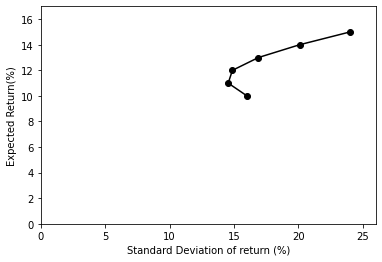

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(Pfolio_DF['stdDev'],Pfolio_DF['expRet'], '-ok')

plt.xlabel('Standard Deviation of return (%)')
plt.ylabel('Expected Return(%)')

#set the max and min of both x and y axis
plt.xlim(0, Pfolio_DF['stdDev'].max() + 2)
plt.ylim(0, Pfolio_DF['expRet'].max() + 2)
plt.show()

**NOTE**<br>
Most investors are risk averse <br>
They want increased expected returns while reducing std deviation of return.<br>
They will want to move as far as possible in a **North East** direction.<br>
Analysis such as this helps investors make more informed investing decisions.<br>



## The Capital Asset Pricing Model - Alpha and Beta

An investor can add a third investment to the portfolio, combine it with any combination of the first 2 investments and produce a new risk return.<br>
They can repeat this with a 4th investment, 5th investment etc.<br>
Eventually we reach the limit of how far North West we can go.<br>
This is known as the efficient frontier


## The Efficient Frontier

For a set of portfolios.

<img src="../Images/eff_front.PNG">


Note that no single investment can beat the efficient frontier. <br>
They cannot have both a lower std dev and a higher return.<br>

The area south west of the efficient frontier are the set of all possible investments and for each of these investments, there is a point of the efficient frontier that has both a higher expected return and a lower std deviation.<br>

# Beta $\beta$

Consider allocating funds for an investment I into a portfolio M, as follows:<br>
- Allocate a portion of the funds for a portfolio M into a risky investment $\beta$ <br>
- Allocate the remainder into a risk free investment $1 - \beta$<br><br>

From the previous equation, the expected return from investment I is <br>
$E(R_I)$ = $(1-\beta_I)R_F$ + $\beta_IE(R_M)$ <br><br>
and because risk free investment have ZERO std deviation<br>
$R_I$ has std deviation $\beta_I\sigma_M$<br><br>

$\sigma_M$ is the std deviation for portfolio M<br><br>

The $\beta$ of an investment measures the sensitivity of the security in comparison to the market as a whole. Another way of viewing this is that it's a measure of the security's systematic risk.

Usually calculated by regressing the security's returns compared to the market's returns.<br>

When $\beta$ is 0, there is no systematic risk and its expected return is $R_F$ (all of the investment is risk free)<br>
When $\beta$ is 1, the security has the same systematic risk as the entire market and its expected return id $E(R_M)$<br><br>


## The CAPM
In general <br>

$E(R)$  =  $R_F + \beta[E(R_M) - R_F]$<br>

This is also known as the capital asset pricing model

For example:<br>
If the risk free rate is 5% and the return on market portfolio is 10%

An investment of $\beta=0$ should have an expected return of 5%

An investment of $\beta=0.5$ should have an expected return of 
    0.05 + 0.5 X (0.1 - 0.05) = 0.075 (7.5%)
    
An investment of $\beta=1.2$ should have an expected return of 
    0.05 + 1.2 X (0.1 - 0.05) = 0.11 (11%)

**A python function to calculate E(R) as defined above.**

**Inputs:**<br>
Rf, beta, Rm

In [17]:
def exp_ret(Rf, beta, Rm):
    return Rf + (beta * (Rm - Rf))

Compare the function output to our calculated output with the following 'unit test'

In [18]:
# Simple tests - assert will throw an error if the expression is not True
assert round(exp_ret(0.05, 0, 0.1), 3) == 0.05
assert round(exp_ret(0.05, 0.5, 0.1), 3) == 0.075
assert round(exp_ret(0.05, 1.2, 0.1), 3) == 0.11

# Alpha $\alpha$

The CAPM relates the expected return on a portfolio to the expected return on the market.<br>
It can also be used to relate the expected return on a portfolio to the actual return on the market.<br><br>
Or<br><br>
$E(R_P) = R_F + \beta(R_M - R_F)$<br><br>
Where<br>
$R_P$ is return on portfolio<br>
$R_F$ is risk free rate<br>
When $\beta$ is 0.6, $R_F$ is 4% and $R_M$ is 20%, 
$R_P$  = 0.04 + 0.6 X(0.2 - 0.04) = 0.136<br><br>
When $\beta$ is 0.6, $R_F$ is 4% and $R_M$ is 10%, 
$R_P$  = 0.04 + 0.6 X(0.1 - 0.04) = 0.076<br><br>
When $\beta$ is 0.6, $R_F$ is 4% and $R_M$ is -10%, 
$R_P$  = 0.04 + 0.6 X(0.2 - 0.04) = -0.044

In [19]:
# Again, verify the function gives the same result as our calculations
assert round(exp_ret(0.04, 0.6, 0.2), 3) == 0.136
assert round(exp_ret(0.04, 0.6, 0.1), 3) == 0.076
assert round(exp_ret(0.04, 0.6, -0.1), 3) == -0.044

Assume that the portfolio manager produces a superior return for the amount of risk taken.<br>
The extra return can be calculated using <br>

$R_P - R_F - \beta(R_M - R_F)$

If this is **positive**, it means the investment outperformed the market.

If its **negative**, it means the investment underperformed the market.

This is knows as alpha $\alpha$

For example<br>
>
>A portfolio manager has a portfolio with **$\beta = 0.8$**<br>
>The 1 year risk free rate of return is 5%.<br>
>The return on the market for the year is 7%<br>
>The portfolio manager's return is 9%<br>
>The manager's alpha is<br>
><BR>
>0.09 - 0.05 - 0.8 X (0.07 - 0.05) = 0.024
>



**Calculate the investors alpha**

Use the `exp_ret` function defined above

**Inputs:**

The Beta of the Portfolio is 0.8<br>
The 1 year risk free rate of return is 5%.<br>
The return on the market for the year is 7%<br>
The portfolio managers return is 9%<br>

In [20]:
alpha = 0.09 - exp_ret(0.05, 0.8, 0.07)

round (alpha, 3)

0.024

Check that the following 'unit test' passes

In [21]:
# Simple test to verify the function works correctly
assert round(0.09 - exp_ret(0.05, 0.8, 0.07), 3) == 0.024